# Porsche PEC HHR instagram profile topic analysis

In [1]:
import pandas as pd
import hdbscan
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
import plotly.express as px

/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-24 15:16:49.565872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Reading the dataframe

In [2]:
df = pd.read_csv("./data/porsche_leizig_instagram.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [3]:
df.head()

,postUrl,postContent,commentCount,likeCount,postTimestamp,type,profileUrl,username,viewCount,playCount,postContentEn
0,https://www.instagram.com/p/Cm3r4Kkq1VJ/,Von 0 auf Wow. 🤩 \nGänsehautmomente und pure E...,1,687,2023-01-01 11:00:06+00:00,Photo,https://www.instagram.com/porscheleipzig,porscheleipzig,NaN,NaN,From 0 to Wow. 🤩\nCreating goosebumps and pure...
1,https://www.instagram.com/p/Cm9eqrfoomo/,Wir sind startklar. \nDenn bald geht es bei un...,10,1149,2023-01-03 17:00:06+00:00,Photo,https://www.instagram.com/porscheleipzig,porscheleipzig,NaN,NaN,We're ready to go.\nBecause we'll be starting ...
2,https://www.instagram.com/p/CnEnSHmKw0u/,Vermutlich die flottesten drei (h)eiligen Köni...,2,473,2023-01-06 11:30:05+00:00,Photo,https://www.instagram.com/porscheleipzig,porscheleipzig,NaN,NaN,Probably the fastest three kings this year.🤭\n...
3,https://www.instagram.com/p/CnM7b4Jq0db/,❗ Gewinnspiel ❗\n \nDie Roten Bullen treffen a...,669,1701,2023-01-09 17:00:06+00:00,Photo,https://www.instagram.com/porscheleipzig,porscheleipzig,NaN,NaN,❗ Competition ❗\n \nThe Red Bulls meet @fcbaye...
4,https://www.instagram.com/p/CnSFBxEqtKB/,Entschleunigung bei einem Becher Kaffee gefäll...,22,788,2023-01-11 17:00:06+00:00,Photo,https://www.instagram.com/porscheleipzig,porscheleipzig,NaN,NaN,Would you like to slow down with a cup of coff...


## BerTopic Model and topic modelling

In [14]:
representation_model = KeyBERTInspired()
model = BERTopic(representation_model=representation_model, n_gram_range=(1, 3))
topics, probs = model.fit_transform(df.postContentEn.values)

In [24]:
print("Model Topics \n")

model.get_topic_info().Name.values

array(['-1_leipzig car_leipzig car auto_leipzig_porschetaycan taycan',
       '0_porsche leipzig_at porsche leipzig_porsche experience_experience center leipzig',
       '1_porscheiceexperience leipzig car_porschelife sportscartogether supercars_porsche911_instacar porscheiceexperience leipzig',
       '2_porsche leipzig_rb leipzig_the leipzig_leipzig',
       '3_porsche track experience_leipzig car_leipzig car auto_porsche track',
       '4_instacar leipzig_leipzig_favorite leipzig_porschedrive'],
      dtype=object)

In [23]:
print("Topic Representations: \n")

for representation in model.get_topic_info().Representation:
    print(representation)
    print()

['leipzig car', 'leipzig car auto', 'leipzig', 'porschetaycan taycan', 'porsche porscheleipzig', 'porschetaycan', 'porschewerkleipzig', 'porsche', 'with porsche', 'porscheexperiencecenterleipzig porschewerkleipzig']
['porsche leipzig', 'at porsche leipzig', 'porsche experience', 'experience center leipzig', 'the porsche experience', 'leipzigtravel leipzigregion', 'porsche experience center', 'leipzigregion visitleipzig leipziglove', 'leipzigtravel', 'leipzig']
['porscheiceexperience leipzig car', 'porschelife sportscartogether supercars', 'porsche911', 'instacar porscheiceexperience leipzig', 'porsche', 'porscheiceexperience leipzig', 'instacar porscheiceexperience', 'porschelife sportscartogether', 'sportscar instacar porscheiceexperience', 'porscheiceexperience']
['porsche leipzig', 'rb leipzig', 'the leipzig', 'leipzig', 'soccer training leipzig', 'training leipzig', 'bundesliga', 'porschewerkleipzig', 'porsche porscheleipzig', 'porsche']
['porsche track experience', 'leipzig car', 

In [26]:
print("Topic Frequency \n")

model.get_topic_freq()

,Topic,Count
0,0,45
4,1,31
3,-1,29
2,2,19
5,3,16
1,4,13


In [ ]:
print("Plotting Topic cluster \n")
try:
    model.visualize_topics()
except:
    print("Topic count too short. Cannot get visualisation")

In [ ]:
print("Plotting Similarity Heatmap \n")

model.visualize_heatmap()

In [75]:
topic_dataframe = model.get_document_info(df.filteredContentEn.values)

In [76]:
df["Topic"] = topic_dataframe["Topic"]

## keyword/topic_representation to Topic generation (chatGPT)

In [77]:
topics = {
    -1: "Porsche e-cars / GTR models",
     0: "Porsche Experience in Leipzig",
     1: "Porsche Car models and drive experience",
     2: "Porsche Leipzig & Soccer/Bundesliga",
     3: "Porsche Track & Racing Experience in Leipzig",
     4: "Car Rentals & Driving in Leipzig with Porsche"
}

In [78]:
df["Topic"] = df["Topic"].map(topics)

## Plotting Topic Distribution

In [79]:
def get_topic_pie_chart(df: pd.DataFrame):
    value_count = pd.DataFrame(df.groupby(["Topic"]).size()).reset_index()
    fig = px.pie(data_frame=value_count, values=0, names="Topic", height=800, width=800)
    return fig

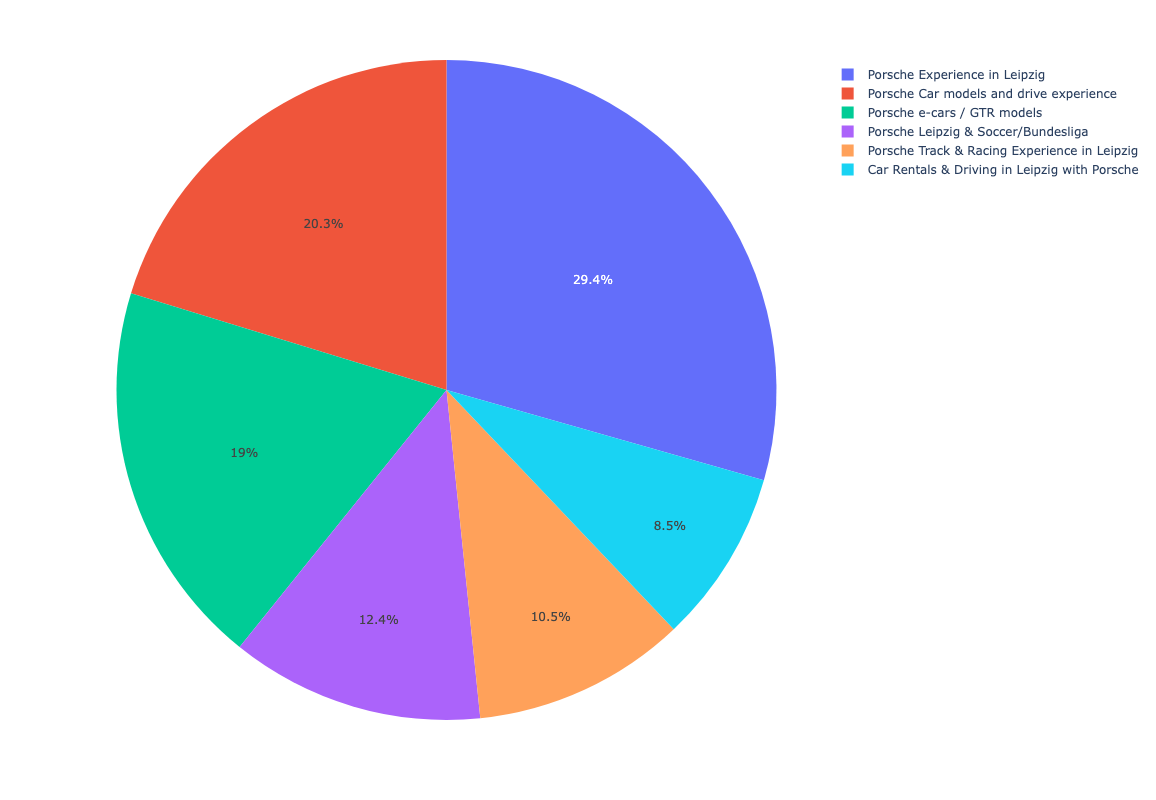

In [85]:
get_topic_pie_chart(df=df).show()

## Writing output file

In [89]:
df.to_excel("./porsche_leipzig_gpt_topics.xlsx", index=False)